## Zadanie 1 - FFT
1. Zaimplementuj funkcję realizującą DFT jako iloczyn macierzy Fouriera Fni n-
elementowego wektora wejściowego (y = Fnx).  
n = 2^r  
[Fn]jk= ξ^jk  
ξ = e^(− 2πi/n) = cos(2π/n)−isin(2π/n)= ̄ω   
2. Zaimplementuj również IDFT korzystając z tożsamosci:  
F^(−1)n y = Fny/n = Fny/n  
Sprawdź poprawność działania funkcji realizującej DFT stosując transformację od-  
wrotną (x = F−1ny) oraz porównując uzyskane wyniki z wyjściem funkcji biblio-  
tecznej.  
3. Zaimplementuj rekurencyjny algorytm Cooleya-Turkeya realizujący szybką trans-  
formację Fouriera (FFT). Porównaj szybkość jego działania z implementacją bi-  
blioteczną oraz implementacją z mnożeniem wektora przez macierz Fn dla danych  
o różnym rozmiarze.  

In [492]:
import math
import numpy as np
import matplotlib.pyplot as plt

Funkcja pomocnicza generująca macierz transformacji

In [493]:
def create_matrix(n):
    ksi = complex(math.cos(2*math.pi / n), - math.sin(2 * math.pi / n)) 
    matrix = np.ones((n, n), dtype=complex)
    for i in range(n):
        for j in range(n):
            matrix[i,j] = ksi ** (i * j)
    return matrix

In [494]:
test_vector = np.array([1,2,3,5,8,13,21,34])
#test_vector = np.array([1,3,2,4])

### DFT

In [495]:
def dft(x):
    return create_matrix(x.shape[0]) @ x

In [496]:
print("My DFT")
print(dft(test_vector))
print("Numpy DFT")
print(np.fft.fft(test_vector))

My DFT
[ 87.         +0.j           5.72792206+46.28427125j
 -15.        +24.j         -19.72792206+10.28427125j
 -21.         +0.j         -19.72792206-10.28427125j
 -15.        -24.j           5.72792206-46.28427125j]
Numpy DFT
[ 87.         +0.j           5.72792206+46.28427125j
 -15.        +24.j         -19.72792206+10.28427125j
 -21.         +0.j         -19.72792206-10.28427125j
 -15.        -24.j           5.72792206-46.28427125j]


### IDFT

In [497]:
def idft(x):
    return np.conj(dft(np.conj(x))) / x.shape[0]

In [498]:
print("My IDFT")
print(idft(dft(test_vector)))
print("Numpy IDFT")
print(np.fft.ifft(np.fft.fft(test_vector)))

My IDFT
[ 1.-3.99680289e-14j  2.-1.55881559e-14j  3.-3.35716300e-16j
  5.+1.60756757e-14j  8.+2.95313717e-14j 13.+4.05160472e-14j
 21.+3.64232634e-14j 34.-4.53734480e-14j]
Numpy IDFT
[ 1.+0.j  2.+0.j  3.+0.j  5.+0.j  8.+0.j 13.+0.j 21.+0.j 34.+0.j]


### FFT

In [499]:
def fft(x):
    n = x.shape[0]

    if n % 2 != 0:
        raise ValueError("Size of x must be a power of 2")
    
    if n == 1: return x
    elif n <= 32: return dft(x)
    else:
        x_even = fft(x[::2])
        x_odd = fft(x[1::2])
        factor = np.exp(-2j * np.pi * np.arange(n) / n)
        return np.concatenate([x_even + factor[:n//2] * x_odd, x_even + factor[n//2:] * x_odd])

In [500]:
print("FFT")
print(fft(test_vector))
print("DFT")
print(dft(test_vector))

FFT
[ 87.         +0.j           5.72792206+46.28427125j
 -15.        +24.j         -19.72792206+10.28427125j
 -21.         +0.j         -19.72792206-10.28427125j
 -15.        -24.j           5.72792206-46.28427125j]
DFT
[ 87.         +0.j           5.72792206+46.28427125j
 -15.        +24.j         -19.72792206+10.28427125j
 -21.         +0.j         -19.72792206-10.28427125j
 -15.        -24.j           5.72792206-46.28427125j]


In [501]:
print("IDFT(FFT)")
print(idft(fft(test_vector)))
print("IDFT(DFT)")
print(idft(dft(test_vector)))

IDFT(FFT)
[ 1.-3.99680289e-14j  2.-1.55881559e-14j  3.-3.35716300e-16j
  5.+1.60756757e-14j  8.+2.95313717e-14j 13.+4.05160472e-14j
 21.+3.64232634e-14j 34.-4.53734480e-14j]
IDFT(DFT)
[ 1.-3.99680289e-14j  2.-1.55881559e-14j  3.-3.35716300e-16j
  5.+1.60756757e-14j  8.+2.95313717e-14j 13.+4.05160472e-14j
 21.+3.64232634e-14j 34.-4.53734480e-14j]


## Zadanie 2 - Sygnały
1. Wygeneruj dwa sygnały czasowo-amplitudowe:  
  - Sygnał będący sumą pięciu sygnałów sinusoidalnych o różnych częstotliwściach  
  - Sygnał złożony z pięciu sygnałów o tych samych częstotliwościach co w punk-  
cie wyżej, ale ułożonych przedziałami, tzn. w każdym z pięciu przedziałów o tej  
samej szerokości występuje sygnał o jednej częstotliwości  
2. Dokonaj transformacji sygnałów a i b do domeny częstotliwościowej, porównaj  
otrzymane wyniki (część rzeczywista, część urojona). Przedstaw na osobnych wy-  
kresach część rzeczywistą i część urojoną wyniku transformacji.  

### Generowanie sygnałów

In [502]:
def gen_sin_signal(data):
    return lambda x: sum([ampl * math.sin(freq * x + phase) for freq, ampl, phase in data])

In [503]:
def gen_peroid_sin_signal(data, peroid):
    breaks = np.linspace(*peroid, len(data) + 1)[1:]
    def signal(x):
        for i, signal_break in enumerate(breaks):
            if x < signal_break:
                freq, ampl, phase = data[i]
                return ampl * math.sin(freq * x + phase)
        return data[-1][1] * math.sin(data[-1][0] * x + data[-1][2])
        
    return signal

In [504]:
# (frequency, amplitude, phase)
data = [(1,1,0), (2,1,0), (5,1,0), (20,1,0), (50,1,0)]

sample_signal = gen_sin_signal(data)
test_signal = np.array(list(map(sample_signal, np.linspace(0, 4 * math.pi, 4096))))

peroid_signal = gen_peroid_sin_signal(data, [0,20])
peroid_test_signal = np.array(list(map(peroid_signal, np.linspace(0, 20, 4096))))

### Testy

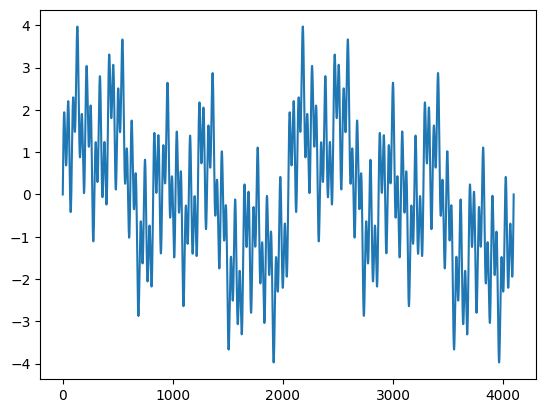

In [505]:
plt.plot(test_signal)
plt.show()

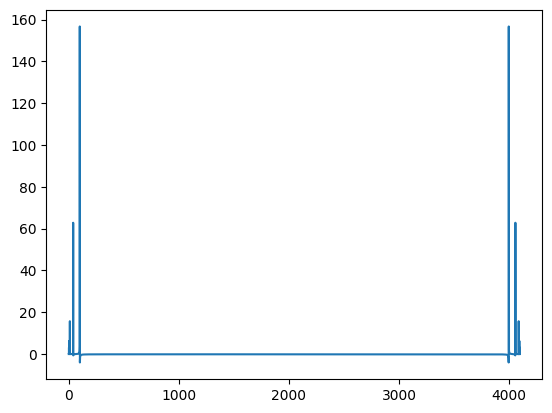

In [506]:
plt.plot(np.real(fft(test_signal)))
plt.show()

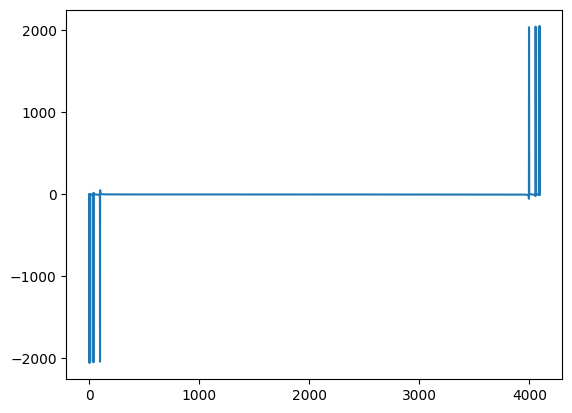

In [507]:
plt.plot(np.imag(fft(test_signal)))
plt.show()

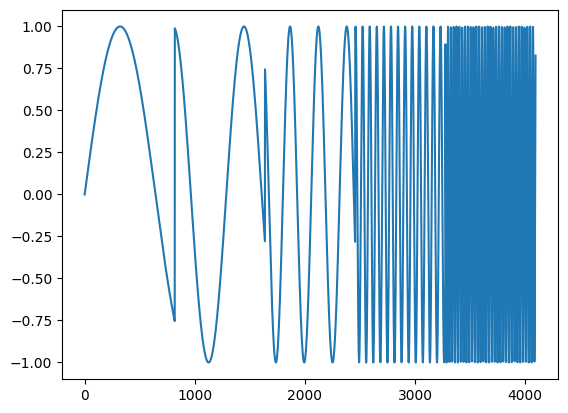

In [508]:
plt.plot(peroid_test_signal)
plt.show()

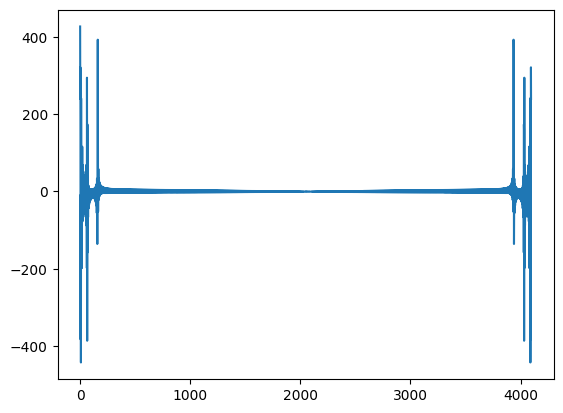

In [509]:
plt.plot(np.real(fft(peroid_test_signal)))
plt.show()

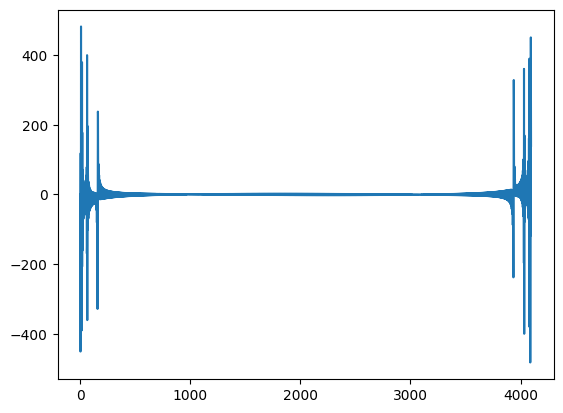

In [510]:
plt.plot(np.imag(fft(peroid_test_signal)))
plt.show()